In [76]:
import sys

!{sys.executable} -m pip install numpy pandas scikit-learn seaborn matplotlib statsmodels openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
orders = pd.read_csv('/Users/myelamar/Desktop/py_notes/testdata/olist_orders_dataset.csv')
order_items = pd.read_csv('/Users/myelamar/Desktop/py_notes/testdata/olist_order_items_dataset.csv')
customers = pd.read_csv('/Users/myelamar/Desktop/py_notes/testdata/olist_customers_dataset.csv')
payments = pd.read_csv('/Users/myelamar/Desktop/py_notes/testdata/olist_order_payments_dataset.csv')
products = pd.read_csv('/Users/myelamar/Desktop/py_notes/testdata/olist_products_dataset.csv')
reviews = pd.read_csv("/Users/myelamar/Desktop/py_notes/testdata/olist_order_reviews_dataset.csv")
sellers = pd.read_csv('/Users/myelamar/Desktop/py_notes/testdata/olist_sellers_dataset.csv')

In [79]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [80]:
print(orders.isnull().sum() / len(orders) *100)
# Orders table contains 3% of the orders with null value so dropping null values in order table
print("size of order table before deleting the null values " + str(orders.shape))
orders.dropna(inplace=True)
print("size of order table after dropping the null values " + str(orders.shape))

# Checking whether any duplicate orders present in the table
print("duplicate orders found in the table " + str(orders.duplicated("order_id").sum()))
# No duplicate orders present in the table

# converting date fields dataType to datatime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Feature Engineering on Orders table
orders['delivered_on_time'] = np.where((orders['order_delivered_customer_date'] <= orders['order_estimated_delivery_date']), 1, 0)
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

print("orders not delivered on time " + str(len(orders.loc[orders['delivered_on_time'] == 0])))

orders.head()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64
size of order table before deleting the null values (99441, 8)
size of order table after dropping the null values (96461, 8)
duplicate orders found in the table 0
orders not delivered on time 7826


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,2


In [81]:
print(order_items.info())
order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [82]:
print(order_items.isnull().sum() / len(order_items) *100)
print("size of order_items table " + str(order_items.shape))
#finding duplicate orders
print("% of duplicate orders found in the order_items table " + str(order_items.duplicated("order_id").sum()/len(order_items) * 100))

# dropping duplicate orders 
order_items = order_items.drop_duplicates(subset='order_id')
print("size of order_items table after removing duplicates " + str(order_items.shape))

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
size of order_items table (112650, 7)
% of duplicate orders found in the order_items table 12.413670661340435
size of order_items table after removing duplicates (98666, 7)


EDA on payments table

In [83]:
print(payments.info())
payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [84]:
print(payments.isnull().sum() / len(payments) *100)
print("size of order_items table " + str(payments.shape))
#finding duplicate orders
print("% of duplicate orders found in the payments table " + str(payments.duplicated("order_id").sum()))
# dropping duplicate orders 
payments = payments.drop_duplicates(subset='order_id')
print("size of order_items table after removing duplicates " + str(payments.shape))

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
size of order_items table (103886, 5)
% of duplicate orders found in the payments table 4446
size of order_items table after removing duplicates (99440, 5)


EDA on reviews table

In [85]:
print(reviews.info())
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


review_id                  0.0
order_id                   0.0
review_score               0.0
review_comment_title       0.0
review_comment_message     0.0
review_creation_date       0.0
review_answer_timestamp    0.0
is_reviewed                0.0
dtype: float64
size of reviews table (98673, 8)
% of duplicate orders found in the reviews table 0
size of reviews table after removing duplicates (98673, 8)


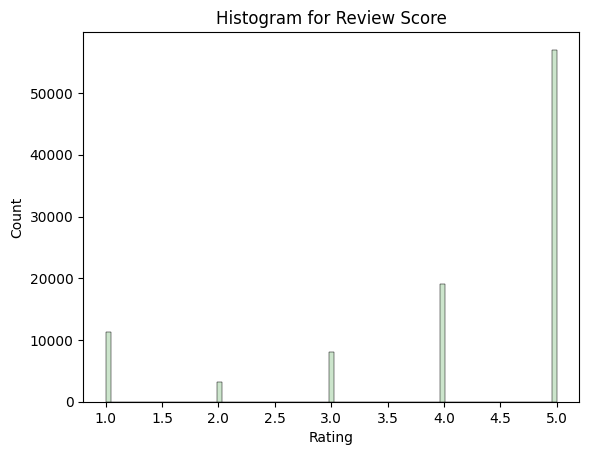

In [87]:
print(reviews.isnull().sum() / len(reviews) *100)
print("size of reviews table " + str(reviews.shape))

# 60% of review comments are missing from the table instead of deleting those marking it to empty value
reviews = reviews.fillna("")

print("% of duplicate orders found in the reviews table " + str(reviews.duplicated("order_id").sum()))
# dropping duplicate orders 
reviews = reviews.drop_duplicates(subset='order_id')
print("size of reviews table after removing duplicates " + str(reviews.shape))

#Feature engineering on reviews table
reviews['is_reviewed'] = np.where((reviews['review_comment_title'] != "") | (reviews['review_comment_message'] != ""), 1, 0)
reviews['customer_satisfaction'] = np.where(reviews['review_score'] >= 4, 1, 0)

# distribution of review scores
sns.histplot(reviews['review_score'], kde=False, color='green', alpha=0.2)
plt.title('Histogram for Review Score')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

EDA on Seller table

In [90]:
print(sellers.info())
sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [92]:
data = reviews.merge(orders, on="order_id", how="left") \
              .merge(order_items, on="order_id", how="left") \
              .merge(payments, on="order_id", how="left")

data['shipped_on_time'] = np.where((data['order_delivered_carrier_date'] <= data['shipping_limit_date']) & (data['order_delivered_carrier_date'].notna()), 1, 0)

In [98]:
final_data = data[['shipped_on_time', 'delivered_on_time', 'delivery_time',
                'payment_value', 'price', 'freight_value', 'is_reviewed', 'customer_satisfaction']]

In [99]:
final_data.head()

,shipped_on_time,delivered_on_time,delivery_time,payment_value,price,freight_value,is_reviewed,customer_satisfaction
0,1,1.0,6.0,397.26,185.00,13.63,0,1
1,1,1.0,9.0,88.09,79.79,8.30,0,1
2,1,1.0,13.0,194.12,149.00,45.12,0,1
3,1,1.0,10.0,222.84,179.99,42.85,1,1
4,0,1.0,18.0,1333.25,1199.00,134.25,1,1


In [100]:
final_data.corr()

,shipped_on_time,delivered_on_time,delivery_time,payment_value,price,freight_value,is_reviewed,customer_satisfaction
shipped_on_time,1.000000,0.187088,-0.231396,-0.045697,-0.036563,-0.036339,-0.061498,0.206223
delivered_on_time,0.187088,1.000000,-0.587449,-0.016006,-0.019601,-0.040546,-0.087387,0.320860
delivery_time,-0.231396,-0.587449,1.000000,0.068782,0.060001,0.214019,0.075797,-0.292621
payment_value,-0.045697,-0.016006,0.068782,1.000000,0.907702,0.454413,0.042430,-0.038536
price,-0.036563,-0.019601,0.060001,0.907702,1.000000,0.420631,0.028833,-0.005614
freight_value,-0.036339,-0.040546,0.214019,0.454413,0.420631,1.000000,0.036056,-0.032183
is_reviewed,-0.061498,-0.087387,0.075797,0.042430,0.028833,0.036056,1.000000,-0.234347
customer_satisfaction,0.206223,0.320860,-0.292621,-0.038536,-0.005614,-0.032183,-0.234347,1.000000
